In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import os
import pandas as pd
import seaborn as sns
from tqdm import tqdm
sns.set()
path = os.path.expanduser('~/Projects/capstone-two/data/processed/Final_Clean_Harbor_Water_Quality.csv', )
wq_df = pd.read_csv(path, parse_dates=['Sample Date'], index_col=0)

Looking at the total number of failures for each 

In [2]:
wq_df.sum().iloc[33:41]

Top Ammonium (mg/L) Failure                                                             147
Top Active Chlorophyll 'A' (µg/L) Failure                                              3628
CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L) Failure    1764
Top Enterococci Bacteria (Cells/100mL) Failure                                         2186
Top Fecal Coliform Bacteria (Cells/100mL) Failure                                      1291
Top Total Kjeldhal Nitrogen (mg/L) Failure                                               11
Top PH Failure                                                                            7
Top Ortho-Phosphorus (mg/L) Failure                                                    1814
dtype: object

Next I create graphs using the average value of the failure column to alter the size of each marker. I used averages to control for differences in sampling frequency.

In [3]:
site_fail_df = wq_df.groupby('Sampling Location').mean().iloc[:, 28:39].drop(columns='Weather Condition (Dry or Wet)_W')

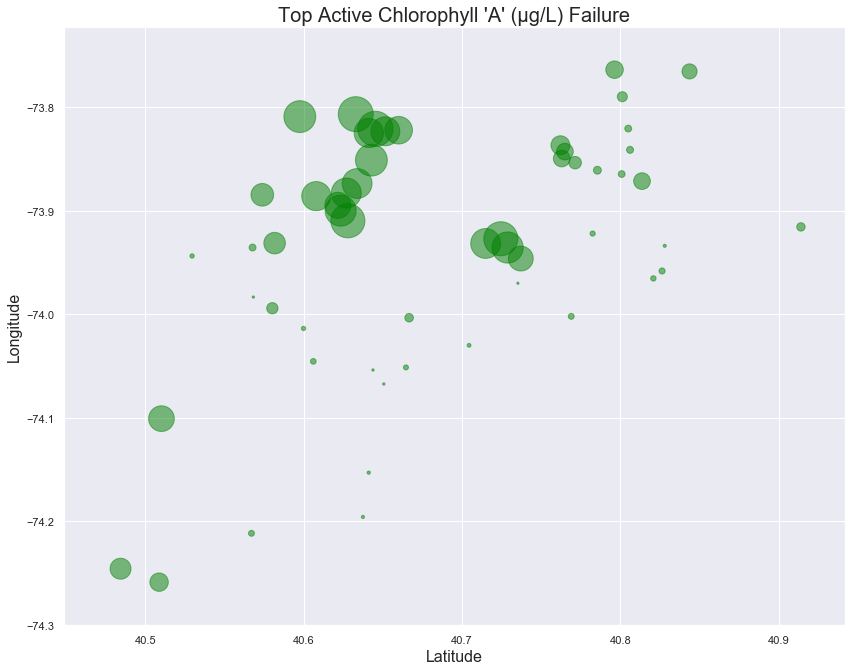

In [4]:
_ = plt.figure(figsize=(14, 11))
_ = plt.scatter(x=site_fail_df['Lat'], y=site_fail_df['Long'], 
                alpha=.5, c='green',
                s=site_fail_df['Top Active Chlorophyll \'A\' (µg/L) Failure']*2500)
_ = plt.title('Top Active Chlorophyll \'A\' (µg/L) Failure', fontsize=20)
_ = plt.xlabel('Latitude', fontsize=16)
_ = plt.ylabel('Longitude', fontsize=16)

# want to add labels to top 5 sites

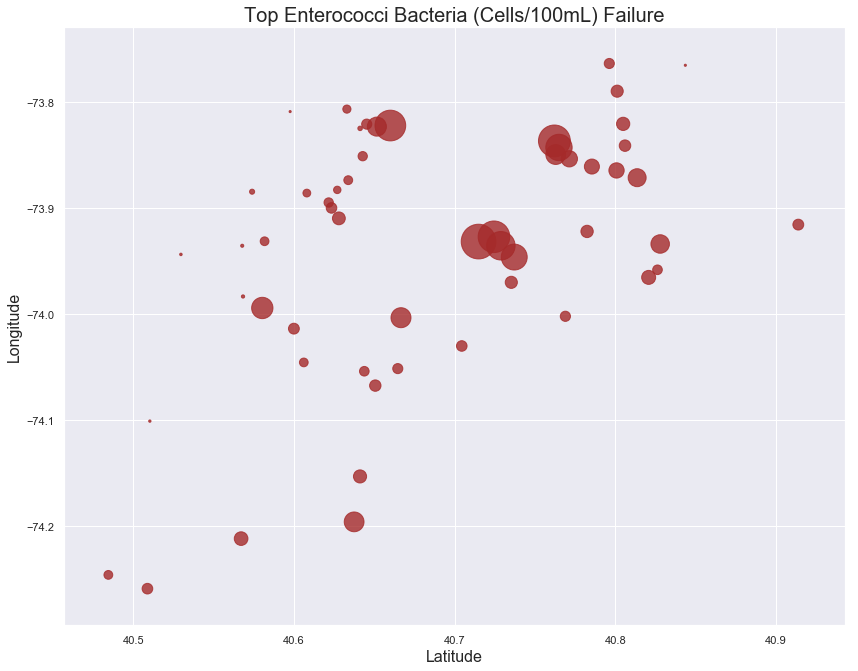

In [5]:
_ = plt.figure(figsize=(14, 11))
_ = plt.scatter(x=site_fail_df['Lat'], y=site_fail_df['Long'], 
                alpha=.8, c='brown',
                s=site_fail_df['Top Enterococci Bacteria (Cells/100mL) Failure']*2500)
_ = plt.title('Top Enterococci Bacteria (Cells/100mL) Failure', fontsize=20)
_ = plt.xlabel('Latitude', fontsize=16)
_ = plt.ylabel('Longitude', fontsize=16)

# want to add labels to top 5 sites

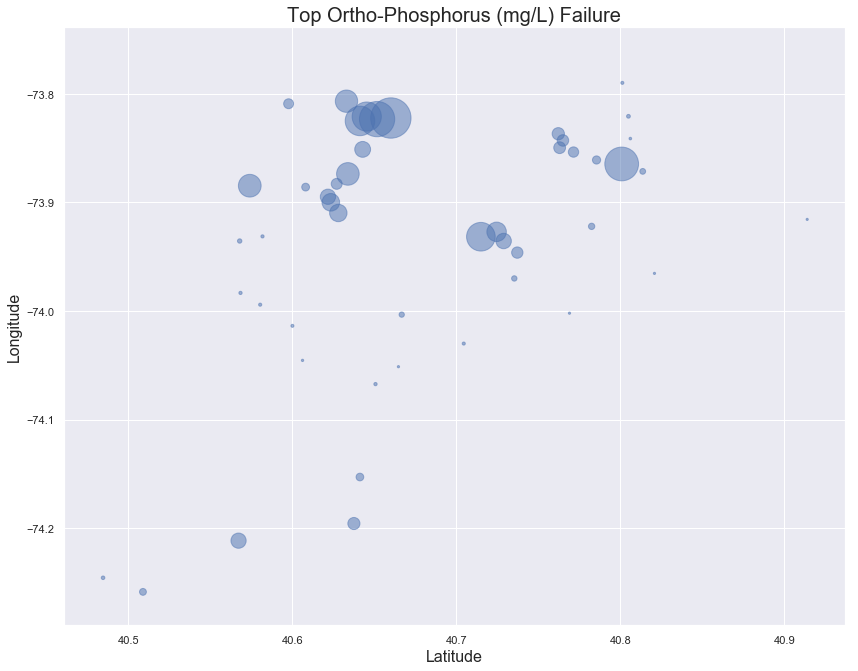

In [6]:
_ = plt.figure(figsize=(14, 11))
_ = plt.scatter(x=site_fail_df['Lat'], y=site_fail_df['Long'], 
                alpha=.5,
                s=site_fail_df['Top Ortho-Phosphorus (mg/L) Failure']*2500)
_ = plt.title('Top Ortho-Phosphorus (mg/L) Failure', fontsize=20)
_ = plt.xlabel('Latitude', fontsize=16)
_ = plt.ylabel('Longitude', fontsize=16)

# want to add labels to top 5 sites

In order to understand the relationships between different sites and their water quality, I need to build a network to perform analysis with. I started by writing a function to build the network, and then from there I apply it my three target columns.

In [7]:
def create_wq_network(df, fail_col):
    '''Takes a dataframe and creates a network out of the 
       different sites within based on fail_col.'''
    G = nx.MultiGraph()
    fail_col_df = df[df[fail_col] == 1]
    fail_col_df = fail_col_df.reset_index(drop=True)


    for i, row in tqdm(fail_col_df.iterrows()):
        # Sample Date is at index 2
        month = row['Sample Date'].month
        year = row['Sample Date'].year
        for row2 in fail_col_df.drop(index=i).itertuples():
            if row2[2].month == month and row2[2].year == year:
                # Sampling Location is at index 1
                G.add_edge(row['Sampling Location'], row2[1],
                               #dates=(row['Sampling Location'], row2[2])
                              )
    return G

In [8]:
chlG = create_wq_network(wq_df, 'Top Active Chlorophyll \'A\' (µg/L) Failure')

3628it [02:28, 24.50it/s]


C:\Users\Drew\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


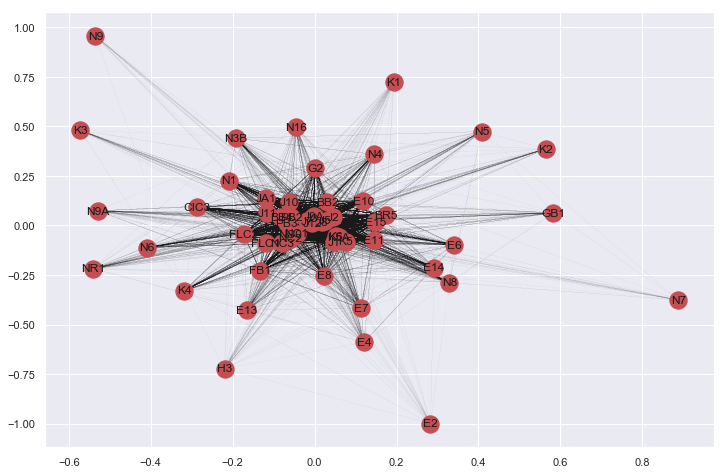

In [9]:
_ = plt.figure(figsize=(12,8))
_ = nx.drawing.nx_pylab.draw_networkx(chlG, width=0.01)
_ = plt.show()

In [10]:
sorted_centrality_c = sorted(nx.degree_centrality(chlG).items(), key = lambda x : x[1], reverse=True)
sorted_centrality_c[:15]

[('NC1', 361.59259259259255),
 ('J12', 337.3703703703703),
 ('J7', 320.8148148148148),
 ('NC2', 286.9259259259259),
 ('J8', 272.1111111111111),
 ('J5', 264.0),
 ('J3', 247.7037037037037),
 ('NC0', 237.48148148148147),
 ('J9A', 208.44444444444443),
 ('NC3', 197.8148148148148),
 ('J2', 191.25925925925924),
 ('PB2', 189.8148148148148),
 ('PB3', 153.07407407407408),
 ('K6', 144.74074074074073),
 ('J11', 123.29629629629629)]

In [11]:
entG = create_wq_network(wq_df, 'Top Enterococci Bacteria (Cells/100mL) Failure')

2186it [01:00, 36.01it/s]


C:\Users\Drew\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


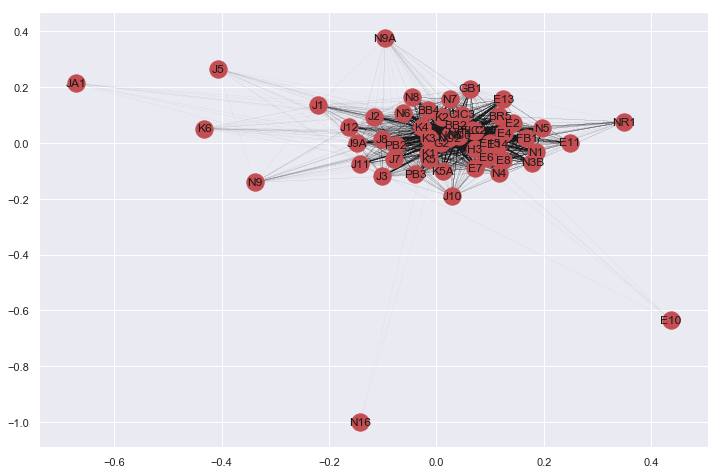

In [12]:
_ = plt.figure(figsize=(12,8))
_ = nx.drawing.nx_pylab.draw_networkx(entG, width=0.01)
_ = plt.show()

In [13]:
sorted_centrality_e = sorted(nx.degree_centrality(entG).items(), key = lambda x : x[1], reverse=True)
sorted_centrality_e[:15]

[('NC1', 173.88888888888889),
 ('NC0', 161.92592592592592),
 ('NC2', 128.7037037037037),
 ('NC3', 100.85185185185185),
 ('FLC1', 100.51851851851852),
 ('FLC2', 64.81481481481481),
 ('K3', 61.888888888888886),
 ('BB2', 61.22222222222222),
 ('G2', 53.07407407407407),
 ('H3', 51.629629629629626),
 ('E15', 42.96296296296296),
 ('E14', 40.11111111111111),
 ('CIC3', 36.0),
 ('E6', 35.25925925925926),
 ('K4', 33.03703703703704)]

In [14]:
phoG = create_wq_network(wq_df, 'Top Ortho-Phosphorus (mg/L) Failure')

1814it [00:42, 42.37it/s]


C:\Users\Drew\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


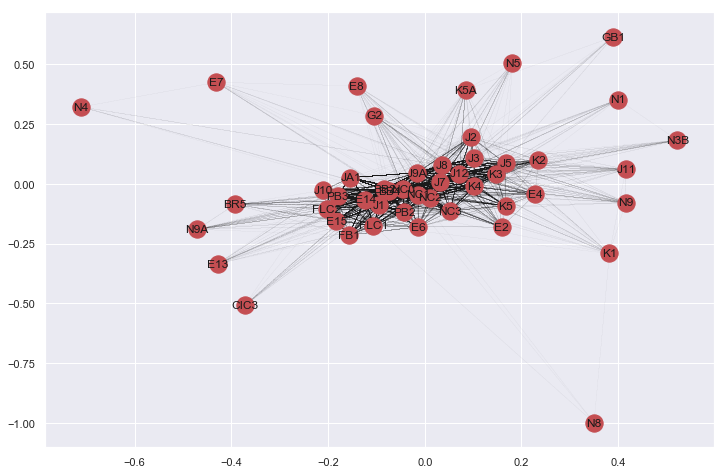

In [15]:
_ = plt.figure(figsize=(12,8))
_ = nx.drawing.nx_pylab.draw_networkx(phoG, width=0.01)
_ = plt.show()

In [16]:
sorted_centrality_p = sorted(nx.degree_centrality(phoG).items(), key = lambda x : x[1], reverse=True)
sorted_centrality_p[:15]

[('E14', 205.52173913043478),
 ('NC0', 131.47826086956522),
 ('BB2', 129.1304347826087),
 ('J7', 123.13043478260869),
 ('BB4', 110.73913043478261),
 ('J12', 98.21739130434783),
 ('J9A', 85.91304347826086),
 ('J1', 71.69565217391305),
 ('NC1', 71.52173913043478),
 ('J8', 54.34782608695652),
 ('NC2', 49.95652173913043),
 ('JA1', 48.565217391304344),
 ('K4', 48.391304347826086),
 ('PB3', 38.130434782608695),
 ('PB2', 32.0)]

There are some sites that are highly central for all three 

In [17]:
c = set([i[0] for i in sorted_centrality_c[:10]])
e = set([i[0] for i in sorted_centrality_e[:10]])
p = set([i[0] for i in sorted_centrality_p[:10]])

In [18]:
ce = c.intersection(e)
cp = c.intersection(p)
ep = e.intersection(p)
cep = ce.intersection(p)

In [19]:
ce

{'NC0', 'NC1', 'NC2', 'NC3'}

In [20]:
cp

{'J12', 'J7', 'J8', 'J9A', 'NC0', 'NC1'}

In [21]:
ep

{'BB2', 'NC0', 'NC1'}

In [22]:
cep

{'NC0', 'NC1'}

In [23]:
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

int_df = wq_df.select_dtypes(include=[float, 'int64'])
int_df = int_df.drop(columns=['Lat', 'Long', 'Top Ortho-Phosphorus (mg/L)'])
features = int_df.loc[:, int_df.columns != 'Top Ortho-Phosphorus (mg/L) Failure']
target = int_df.loc[:, 'Top Ortho-Phosphorus (mg/L) Failure']

Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, 
                                                random_state=13, 
                                                stratify=target)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)


skb = SelectKBest(mutual_info_classif, k=features.shape[1])
skb.fit(Xtrain, ytrain)
mask = skb.get_support()
kbestfeat = list()

for boolean, feature in zip(mask, int_df.columns):
    if boolean:
        kbestfeat.append(feature)

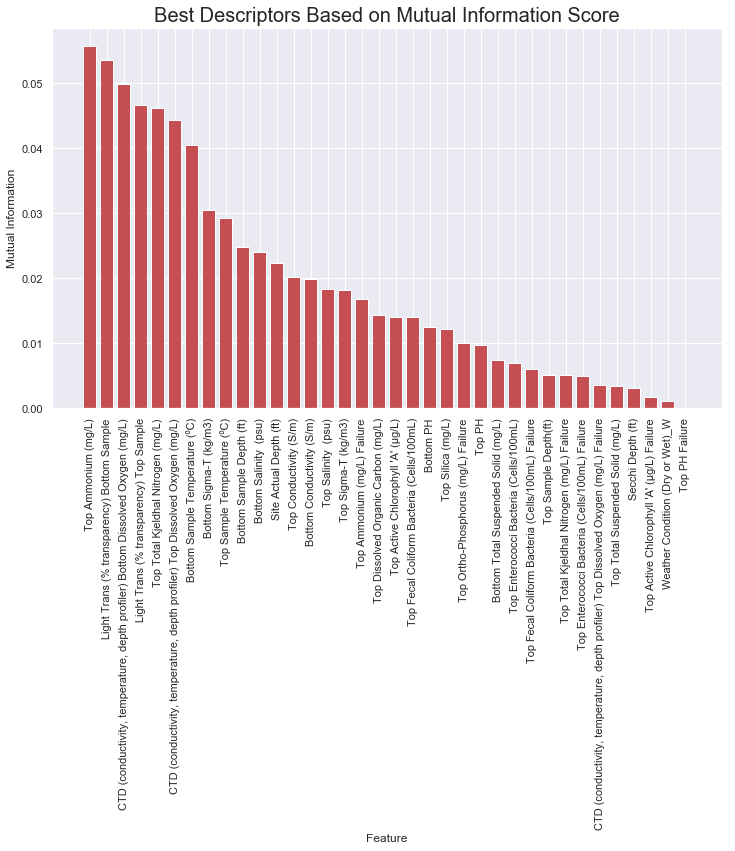

In [24]:
indices = np.argsort(skb.scores_)[::-1]
cols = []
for i in range(36):
    cols.append(int_df.columns[indices[i]])

# Now plot
_ = plt.figure(figsize=[12,7])
_ = plt.bar(cols, skb.scores_[indices[range(36)]], color='r', align='center')
_ = plt.xticks(rotation=90)
_ = plt.title('Best Descriptors Based on Mutual Information Score', size=20)
_ = plt.xlabel('Feature')
_ = plt.ylabel('Mutual Information')
_ = plt.show()

In [25]:
skb.scores_

array([0.0292334 , 0.0404803 , 0.0224017 , 0.00513678, 0.02473257,
       0.01835516, 0.02404412, 0.02025482, 0.01988667, 0.04437007,
       0.04986701, 0.04672075, 0.05359734, 0.018218  , 0.03052399,
       0.00301645, 0.00968258, 0.0124756 , 0.01396215, 0.00693894,
       0.05579987, 0.04621381, 0.01217752, 0.00335041, 0.00738012,
       0.01397732, 0.01428916, 0.00103838, 0.01673774, 0.00168755,
       0.00351724, 0.00491815, 0.00593973, 0.00501943, 0.        ,
       0.01000349])

Perform clustering on the different sites based on the frequency that they

take clusters and see which sites are the strongest predictor of cluster failures.